## Overview

One of the best things about the scikit-learn library in python is that it provides four steps modeling patterns that make it easy for the programmer to train a machine learning classifier. In this article, I will use Logistic Regression with python, to classify the digits which are based on images. After preparing our machine learning model with this logistic regression, we can use it to predict an image labeled with the numbers.

## Logistic Regression on Digits with Python

The scikit-learn library comes with a preloaded digits dataset. That means we need to load the digits dataset, and we are not required to download any dataset for this classification. Now let’s load our dataset.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

Now let’s look at some insights from the dataset.

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


## To Show the Images and Labels in Digits Dataset

Now let’s see what our data contains, I will visualize the images and labels present in the dataset, to know what I need to work with.

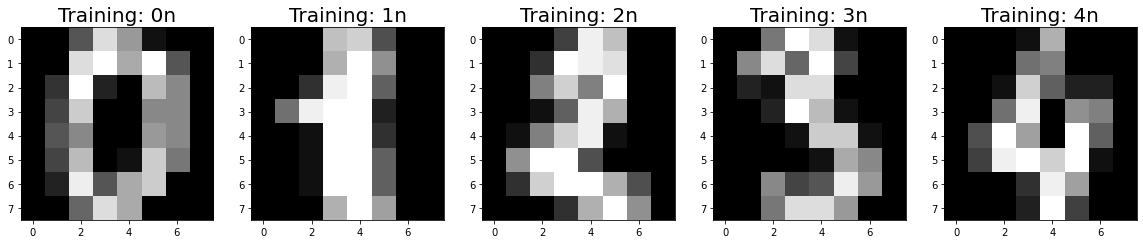

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %in' % label, fontsize = 20)

## Split the Data into Training and Test Set

Step one is the import the model that we want to use, As this article is based on the logistic regression so, I will import the logistic regression model from the scikit-learn library in python.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, test_size=0.25, 
                                                    random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

Step two is to create an instance of the model, which means that we need to store the Logistic Regression model into a variable.

In [6]:
logisticRegr = LogisticRegression()

Step three will be to train the model. For this, we need the fit the data into our Logistic Regression model.

In [7]:
logisticRegr.fit(x_train, y_train)

C:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Step four is to predict the labels for the new data,
In this step, we need to use the information that we learned while training the model.

In [8]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)

## Measure the Accuracy of our Logistic Regression Model

I will measure the Accuracy of our trained Logistic Regressing Model, where Accuracy is defined as the fraction of correct predictions, which is correct predictions/total number of data points.

In [9]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


So our Accuracy gives the output as **95.1 percent**, which is generally appreciated.

## Confusion Matrix

Confusion Matrix is the table used in describing the performance of a Classifier that we have trained using the dataset. Here I will use Matplotlib and Seaborn in python to describe the performance of our trained model.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Now let’s visualize our performance using the confusion matrix. First, I will visualize the confusion matrix using the Seaborn library in python.

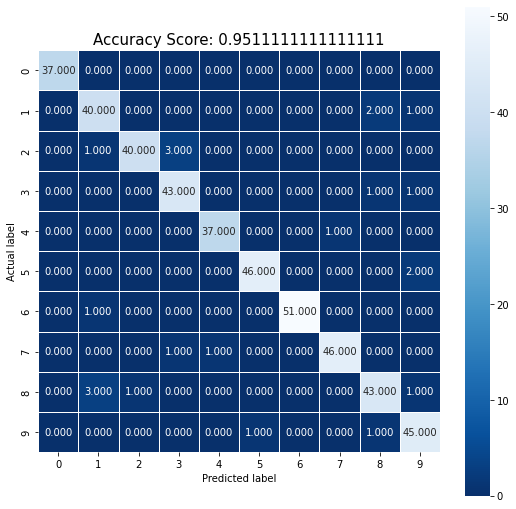

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

Now let’s visualize our Logistic Regression model’s performance with the confusion matrix using the matplotlib library in python.

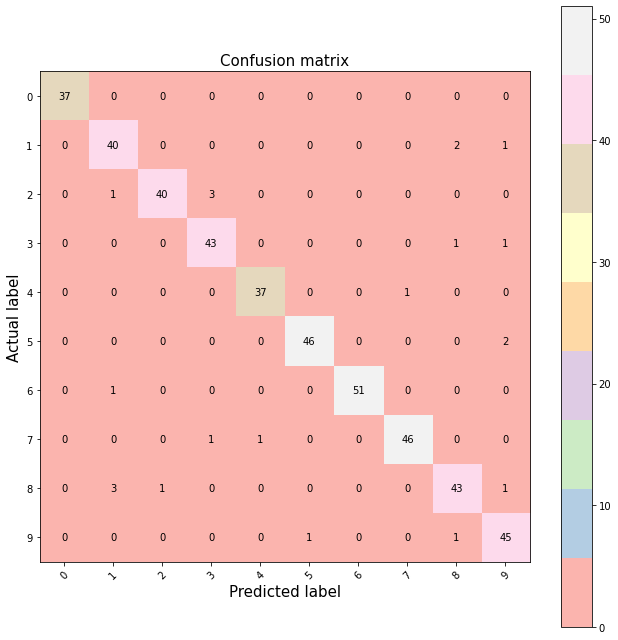

In [14]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')